## 安裝套件

In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install feedparser

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install jieba

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!mkdir jieba_data

�l�ؿ����ɮ� jieba_data �w�g�s�b�C


### 下載字數較多的辭典檔

In [6]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

'wget' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 解析 RSS

In [8]:
import feedparser

In [9]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [10]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '隔離期間逼退加劇 拜登惱火老友與黨內落井下石',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '隔離期間逼退加劇 拜登惱火老友與黨內落井下石'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/10511/8107710'}],
   'link': 'https://money.udn.com/money/story/10511/8107710',
   'published': 'Sat, 20 Jul 2024 12:01:03 +0800',
   'published_parsed': time.struct_time(tm_year=2024, tm_mon=7, tm_mday=20, tm_hour=4, tm_min=1, tm_sec=3, tm_wday=5, tm_yday=202, tm_isdst=0),
   'summary': '美國總統拜登面臨黨內「換拜」壓力日增。媒體披露，因確診COVID而於老家自宅隔離的拜登惱火遭黨內遺棄，懷恨包括歐巴馬在內...',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '美國總統拜登面臨黨內「換拜」壓力日增。媒體披露，因確診COVID而於老家自宅隔離的拜登惱火遭黨內遺棄，懷恨包括歐巴馬在內...'},
   'id': 'https://money.udn.com/money/story/10511/8107710',
   'guidisl

### 查看每個 entry 的 title, url 

In [11]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 隔離期間逼退加劇 拜登惱火老友與黨內落井下石, https://money.udn.com/money/story/10511/8107710
2, 美學者評川普 交易性格誤解晶片業對台灣是風險, https://money.udn.com/money/story/10511/8107604
3, 共和黨全代會萬人湧入密爾瓦基 高規格維安傷生意, https://money.udn.com/money/story/10511/8107331
4, 民主黨連番逼宮 拜登團隊反擊誓言不退選, https://money.udn.com/money/story/10511/8107247
5, 拜登稱將重返競選活動 痛批川普「黑暗」演說, https://money.udn.com/money/story/10511/8107244
6, 華爾街日報記者被控間諜案  俄羅斯法院判刑16年, https://money.udn.com/money/story/10511/8106983
7, 挺川普或拜登？ 祖克柏拒絕表態, https://money.udn.com/money/story/10511/8106960
8, 感謝摔角明星撕衣力挺 川普提名演說5大亮點一次看, https://money.udn.com/money/story/10511/8106858
9, 市場關注美大選不確定性和中國經濟 亞股跌多漲少, https://money.udn.com/money/story/10511/8106677
10, 美國白宮：以色列總理尼坦雅胡將訪華府可望見拜登, https://money.udn.com/money/story/10511/8106612
11, 拜登再免除12億美元學貸 3.5萬人受惠, https://money.udn.com/money/story/10511/8106229
12, 川普允諾：若重返白宮將終結戰爭 重塑美國強權威望, https://money.udn.com/money/story/10511/8106171
13, 20歲槍手暗殺川普未遂 傳手機存有多位高官照片, https://money.udn.com/money/story/10511/8106135
14, 美保守派政治名嘴魯道柏逝世 曾力挺川普批

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [12]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用剛剛下載的辭典

In [13]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [14]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [15]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/10511/8107710
sleep time: 9 sec
https://money.udn.com/money/story/10511/8107604
sleep time: 10 sec
https://money.udn.com/money/story/10511/8107331
sleep time: 6 sec
https://money.udn.com/money/story/10511/8107247
sleep time: 7 sec
https://money.udn.com/money/story/10511/8107244
sleep time: 4 sec
https://money.udn.com/money/story/10511/8106983
sleep time: 7 sec
https://money.udn.com/money/story/10511/8106960
sleep time: 5 sec
https://money.udn.com/money/story/10511/8106858
sleep time: 10 sec
https://money.udn.com/money/story/10511/8106677
sleep time: 9 sec
https://money.udn.com/money/story/10511/8106612
sleep time: 9 sec
https://money.udn.com/money/story/10511/8106229
sleep time: 4 sec
https://money.udn.com/money/story/10511/8106171
sleep time: 4 sec
https://money.udn.com/money/story/10511/8106135
sleep time: 6 sec
https://money.udn.com/money/story/10511/8106048
sleep time: 4 sec
https://money.udn.com/money/story/10511/8105887
sleep time: 9 sec
https://

"美國總統拜登面臨黨內「換拜」壓力日增。媒體披露，因確診COVID而於老家自宅隔離的拜登惱火遭黨內遺棄，懷恨包括歐巴馬在內老戰友在這場精心策畫的逼宮裡背後捅刀。華盛頓郵報指出，共和黨提名大會結束後，民主黨又有10名眾議員、2名參議員加入，讓黨內勸退拜登的國會議員人數到19日晚間達到37人。然就在一個月前，民主黨所有人都還團結在拜登身後、一起痛批共和黨對手川普這位官司定罪、煽動國會山莊暴動的破壞分子對美國民主的威脅，前眾院議長裴洛西（Nancy Pelosi）宛如頌歌的一句「多元是我們的優勢、團結就是我們的力量」6月還響徹民主黨內；但6月27日拜登與川普辯論表現不佳後，一切全變調。紐約時報引述與拜登關係密切人士透露，政壇打滾多年的拜登一眼就能看出，近日洩給媒體作為逼他退選的報導是精心策畫的協同作業。拜登認為裴洛西正是一大煽動者，但也惱火昔日親密搭檔的前總統歐巴馬，覺得他也有在幕後操控。紐時指出，現任總統和所屬黨內要員們間於如此鄰近大選時摩擦劇烈，在華府政壇並不多見，尤其現在逼退拜登的人都是過去幾十年來與他攜手邁向成功的黨內重要盟友。歐巴馬曾提拔拜登為副總統，更助他在2020年入主白宮；裴洛西則協助拜登達成諸多立法成就。幾個堅持不具名的親近拜登人士，描述目前這位在離白宮數百英里外養病、不時傳出乾咳的現任總統是如何處在政治生涯最黑暗的時刻。對一篇又一篇逼宮報導，拜登益發惱火。這些報導稱參議院多數黨領袖舒默（Chuck Schumer）、眾議院少數黨領袖傑福瑞斯（Hakeem Jeffries）、裴洛西、歐巴馬等人警告，11月大選民主黨將遭受毀滅性敗選。拜登更注意到歐巴馬近日沒有任何雪中送炭之舉，並有前助理出面帶頭呼籲他退選，更被拜登解讀為代表這位昔日上司的態度。此外，也有前總統柯林頓的幕僚跳出來勸退拜登。拜登在私下痛罵歐巴馬及柯林頓幕僚時表明，他覺得這些人於1994、2010年期中選舉害民主黨慘敗，現在卻反過來教他怎麼救全黨顯得格外諷刺，反而自己2022年期中選舉還為民主黨保住參議院。不過拜登砲火僅限柯林頓的幕僚，對仍在勸金主出力的柯林頓本人還是感激，但說到歐巴馬時則完全不假辭色。共和黨提名大會結束後，19日又有更多國會民主黨人公開呼籲拜登讓賢，其中有新墨西哥州聯邦參議員海恩瑞希（Martin Heinrich）、俄亥俄州聯邦參議員布朗（Sherrod Brown），以及

### 做分詞

In [16]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from d:\GitHub\2024_python_crawler_learning\work\Text_wordcloud\jieba_data\dict.txt.big ...
Dumping model to file cache C:\Users\madok\AppData\Local\Temp\jieba.u2f560d3046df8da68b2c8484fd641613.cache
Loading model cost 2.724 seconds.
Prefix dict has been built successfully.


['美國',
 '總統',
 '拜登',
 '面臨',
 '黨內',
 '「',
 '換拜',
 '」',
 '壓力',
 '日增',
 '。',
 '媒體',
 '披露',
 '，',
 '因',
 '確診',
 'COVID',
 '而於',
 '老家',
 '自宅',
 '隔離',
 '的',
 '拜登',
 '惱火',
 '遭',
 '黨內',
 '遺棄',
 '，',
 '懷恨',
 '包括',
 '歐',
 '巴馬',
 '在內',
 '老戰友',
 '在',
 '這場',
 '精心',
 '策畫',
 '的',
 '逼宮',
 '裡',
 '背後',
 '捅',
 '刀',
 '。',
 '華盛頓郵報',
 '指出',
 '，',
 '共和黨',
 '提名',
 '大會',
 '結束',
 '後',
 '，',
 '民主黨',
 '又',
 '有',
 '10',
 '名眾',
 '議員',
 '、',
 '2',
 '名',
 '參議員',
 '加入',
 '，',
 '讓',
 '黨內',
 '勸退',
 '拜登',
 '的',
 '國會議員',
 '人數',
 '到',
 '19',
 '日',
 '晚間',
 '達到',
 '37',
 '人',
 '。',
 '然',
 '就',
 '在',
 '一個月',
 '前',
 '，',
 '民主黨',
 '所有人',
 '都還',
 '團結',
 '在',
 '拜登',
 '身後',
 '、',
 '一起',
 '痛批',
 '共和黨',
 '對手',
 '川普',
 '這位',
 '官司',
 '定罪',
 '、',
 '煽動',
 '國會',
 '山莊',
 '暴動',
 '的',
 '破壞分子',
 '對',
 '美國',
 '民主',
 '的',
 '威脅',
 '，',
 '前眾院',
 '議長',
 '裴洛西',
 '（',
 'Nancy',
 ' ',
 'Pelosi',
 '）',
 '宛如',
 '頌歌',
 '的',
 '一句',
 '「',
 '多元',
 '是',
 '我們',
 '的',
 '優勢',
 '、',
 '團結',
 '就是',
 '我們',
 '的',
 '力量',
 '」',
 '6',
 '月還',
 '響徹',
 '民主黨',
 '內',
 '；'

In [17]:
!ls jieba_data

'ls' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


### 準備 stop word

In [18]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否']

### 準備一個利用stop word過濾後的分詞結果

In [19]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['美國',
 '總統',
 '拜登',
 '面臨',
 '黨內',
 '「',
 '換拜',
 '」',
 '壓力',
 '日增',
 '。',
 '媒體',
 '披露',
 '，',
 '因',
 '確診',
 'COVID',
 '而於',
 '老家',
 '自宅',
 '隔離',
 '拜登',
 '惱火',
 '遭',
 '黨內',
 '遺棄',
 '，',
 '懷恨',
 '包括',
 '歐',
 '巴馬',
 '在內',
 '老戰友',
 '在',
 '這場',
 '精心',
 '策畫',
 '逼宮',
 '裡',
 '背後',
 '捅',
 '刀',
 '。',
 '華盛頓郵報',
 '指出',
 '，',
 '共和黨',
 '提名',
 '大會',
 '結束',
 '後',
 '，',
 '民主黨',
 '又',
 '有',
 '10',
 '名眾',
 '議員',
 '、',
 '2',
 '名',
 '參議員',
 '加入',
 '，',
 '讓',
 '黨內',
 '勸退',
 '拜登',
 '國會議員',
 '人數',
 '到',
 '19',
 '日',
 '晚間',
 '達到',
 '37',
 '人',
 '。',
 '然',
 '在',
 '一個月',
 '前',
 '，',
 '民主黨',
 '所有人',
 '都還',
 '團結',
 '在',
 '拜登',
 '身後',
 '、',
 '一起',
 '痛批',
 '共和黨',
 '對手',
 '川普',
 '這位',
 '官司',
 '定罪',
 '、',
 '煽動',
 '國會',
 '山莊',
 '暴動',
 '破壞分子',
 '對',
 '美國',
 '民主',
 '威脅',
 '，',
 '前眾院',
 '議長',
 '裴洛西',
 '（',
 'Nancy',
 ' ',
 'Pelosi',
 '）',
 '宛如',
 '頌歌',
 '一句',
 '「',
 '多元',
 '優勢',
 '、',
 '團結',
 '就是',
 '力量',
 '」',
 '6',
 '月還',
 '響徹',
 '民主黨',
 '內',
 '；',
 '但',
 '6',
 '月',
 '27',
 '日',
 '拜登',
 '與川普',
 '辯論',
 '表現',
 '不佳',
 '後',

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

d:\GitHub\2024_python_crawler_learning\venv\lib\site-packages\matplotlib\mpl-data\matplotlibrc


#### 清除 matplotlib 快取

In [21]:
print(matplotlib.get_configdir())

C:\Users\madok\.matplotlib


In [22]:
!ls -la /home/jovyan/.config/matplotlib

'ls' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [23]:
print(matplotlib.get_cachedir())

C:\Users\madok\.matplotlib


In [24]:
!rm -rf /home/jovyan/.cache/matplotlib

'rm' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [25]:
# #用來顯示中文
# plt.rcParams['font.sans-serif']=['SimHei']
# #用來顯示負號
# plt.rcParams['axes.unicode_minus']=False

#### 其他 FAQ 可以參考 https://matplotlib.org/3.1.1/faq/troubleshooting_faq.html

### 繪製文字雲 ( wordcloud.generate )

In [26]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

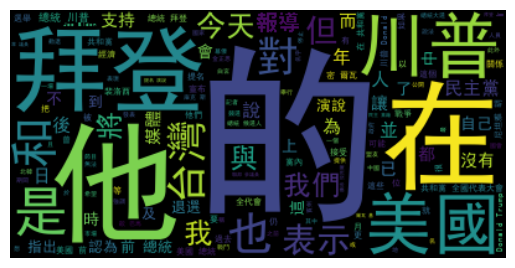

In [27]:
#不同字型
wordcloud = WordCloud(font_path='fonts/SimHei.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

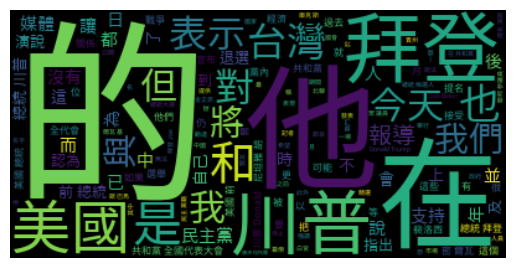

In [28]:
#不同字型
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [29]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'，': 491,
         '的': 287,
         '。': 248,
         '（': 124,
         '）': 124,
         '「': 101,
         '」': 101,
         '他': 101,
         '拜登': 95,
         ' ': 93,
         '在': 88,
         '川普': 88,
         '美國': 82,
         '、': 62,
         '總統': 53,
         '是': 42,
         '和': 37,
         '台灣': 33,
         '也': 29,
         '共和黨': 28,
         '與': 26,
         '對': 25,
         '報導': 25,
         '表示': 25,
         '前': 24,
         '但': 23,
         '今天': 23,
         '我': 23,
         '我們': 21,
         '將': 21,
         '：': 21,
         '民主黨': 19,
         '為': 19,
         '說': 19,
         '人': 18,
         '演說': 18,
         '日': 17,
         '並': 17,
         '年': 17,
         '後': 16,
         '盟友': 16,
         '指出': 15,
         '有': 15,
         '白宮': 15,
         '而': 15,
         '媒體': 14,
         '提名': 14,
         '讓': 14,
         '都': 14,
         '沒有': 14,
         '中': 14,
         '已': 14,
         '支持': 14,
         '全國代表大會'

In [30]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

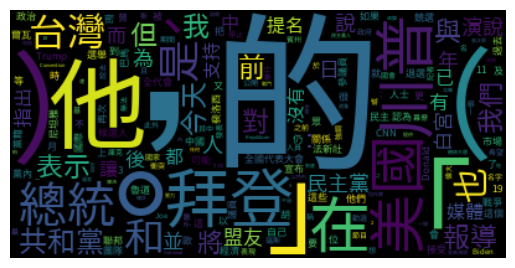

In [31]:
#沒有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

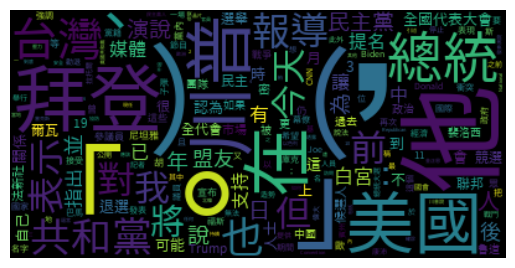

In [32]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()